<a href="https://colab.research.google.com/github/Salvini126/informatica/blob/main/geopandas_Ezz_5Zz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installare (se necessario) e importare GeoPandas

In [ ]:
!pip install geopandas
!pip install contextily

In [ ]:
%matplotlib inline
import contextily
import pandas as pd
import geopandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip
bici = geopandas.read_file("/content/drive/MyDrive/bike_ciclabili.zip")
bici

id_amat  ...                                           geometry
0        9001  ...  LINESTRING (9.18700 45.48095, 9.18696 45.48085...
1        9002  ...  LINESTRING (9.24192 45.43931, 9.24202 45.43939...
2        9003  ...  LINESTRING (9.23979 45.43996, 9.23991 45.43998...
3        9004  ...    LINESTRING (9.23902 45.44251, 9.23898 45.44256)
4        9005  ...  LINESTRING (9.23990 45.43999, 9.23985 45.44009...
...       ...  ...                                                ...
3160    12932  ...    LINESTRING (9.14977 45.46021, 9.14979 45.46024)
3161    12933  ...    LINESTRING (9.14966 45.46050, 9.14972 45.46057)
3162    12934  ...    LINESTRING (9.14963 45.46046, 9.14966 45.46050)
3163    12935  ...    LINESTRING (9.14957 45.46039, 9.14963 45.46046)
3164    12936  ...    LINESTRING (9.14954 45.46035, 9.14957 45.46039)

[3165 rows x 11 columns]

In [ ]:
# visualizzaere il geodataset delel piste ciclabili

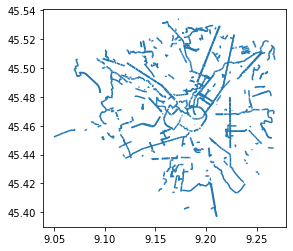

In [ ]:
bici.plot()

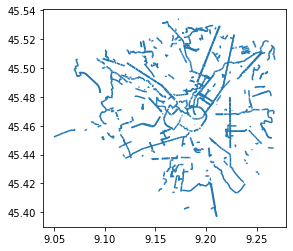

In [ ]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip
milano = geopandas.read_file("/content/drive/MyDrive/ds964_nil_wm.zip")
milano

In [ ]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili

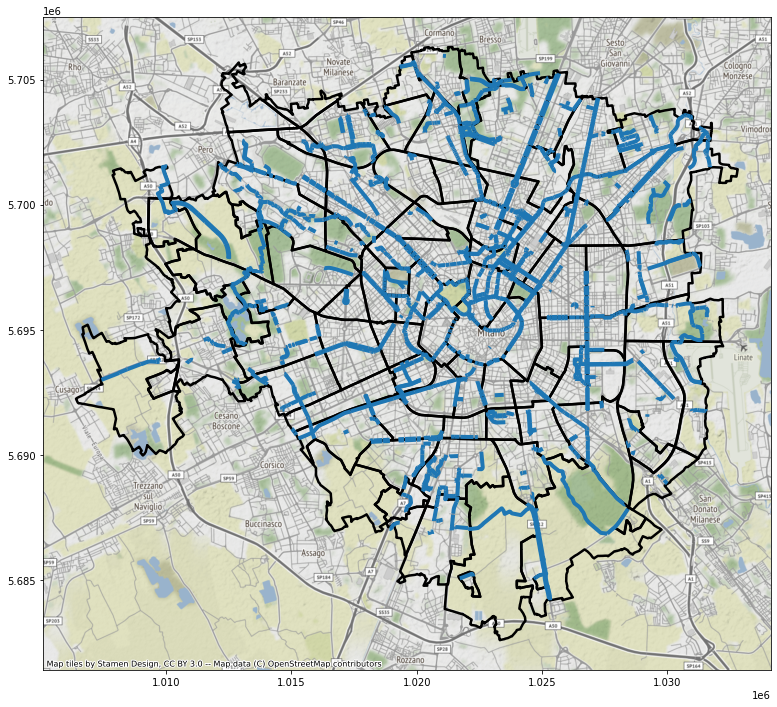

In [ ]:
ax= milano.to_crs(epsg=3857).plot(figsize=(24,12),facecolor="none",edgecolor="k",linewidth=2.5)
bici.to_crs(epsg=3857).plot(ax=ax,linewidth=4)
contextily.add_basemap(ax)

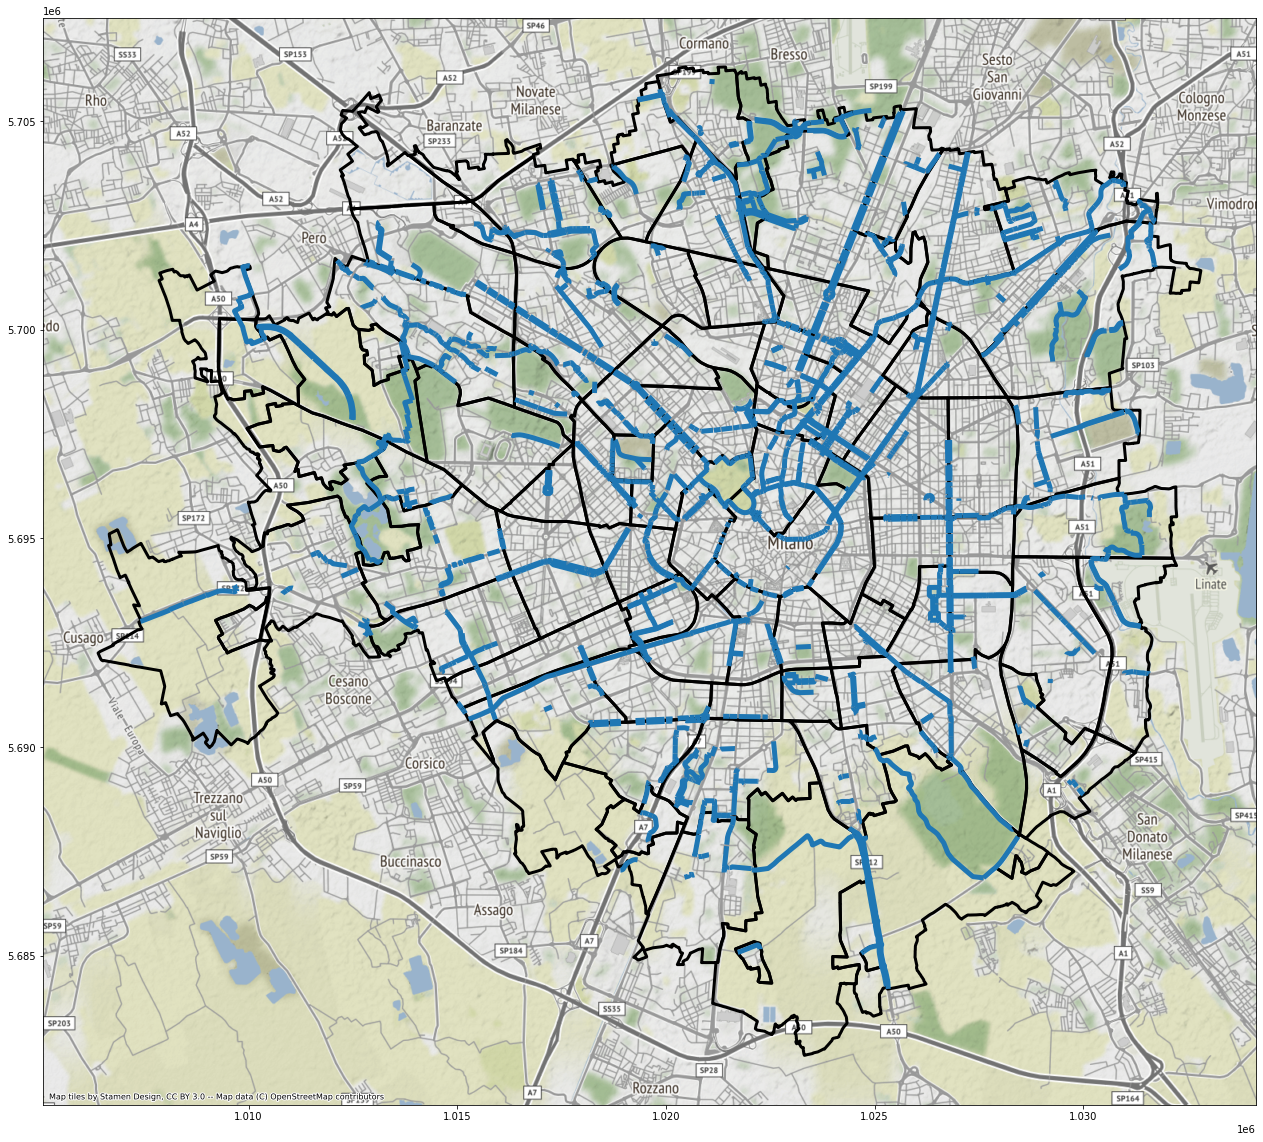

In [ ]:
# trovare il quartiere meno esteso


ID_NIL  ...                                           geometry
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...

[1 rows x 9 columns]

In [ ]:
quaPiccolo=milano[milano["Shape_Area"]==milano["Shape_Area"].min()]
quaPiccolo

ID_NIL  ...                                           geometry
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...

[1 rows x 9 columns]

In [ ]:
# trovare il quartiere più esteso


ID_NIL  ...                                           geometry
55      85  ...  POLYGON ((9.21711 45.43187, 9.21733 45.43160, ...

[1 rows x 9 columns]

In [ ]:
quaGrande=milano[milano["Shape_Area"]==milano["Shape_Area"].max()]
quaGrande

ID_NIL  ...                                           geometry
55      85  ...  POLYGON ((9.21711 45.43187, 9.21733 45.43160, ...

[1 rows x 9 columns]

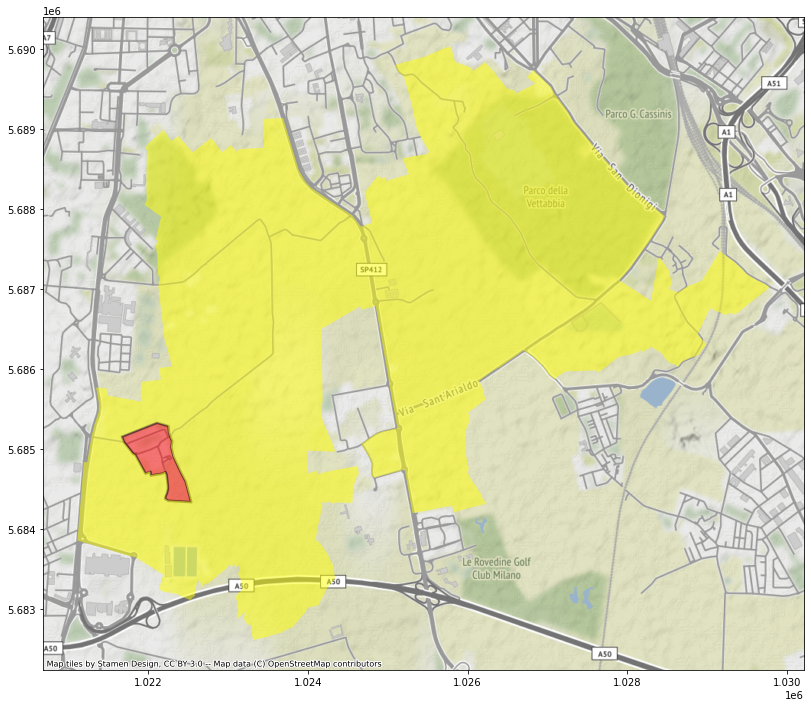

In [ ]:
ax= quaPiccolo.to_crs(epsg=3857).plot(figsize=(24,12),facecolor="red",alpha=0.5,edgecolor="k",linewidth=2.5)
quaGrande.to_crs(epsg=3857).plot(ax=ax,facecolor="yellow",alpha=0.5)
contextily.add_basemap(ax)

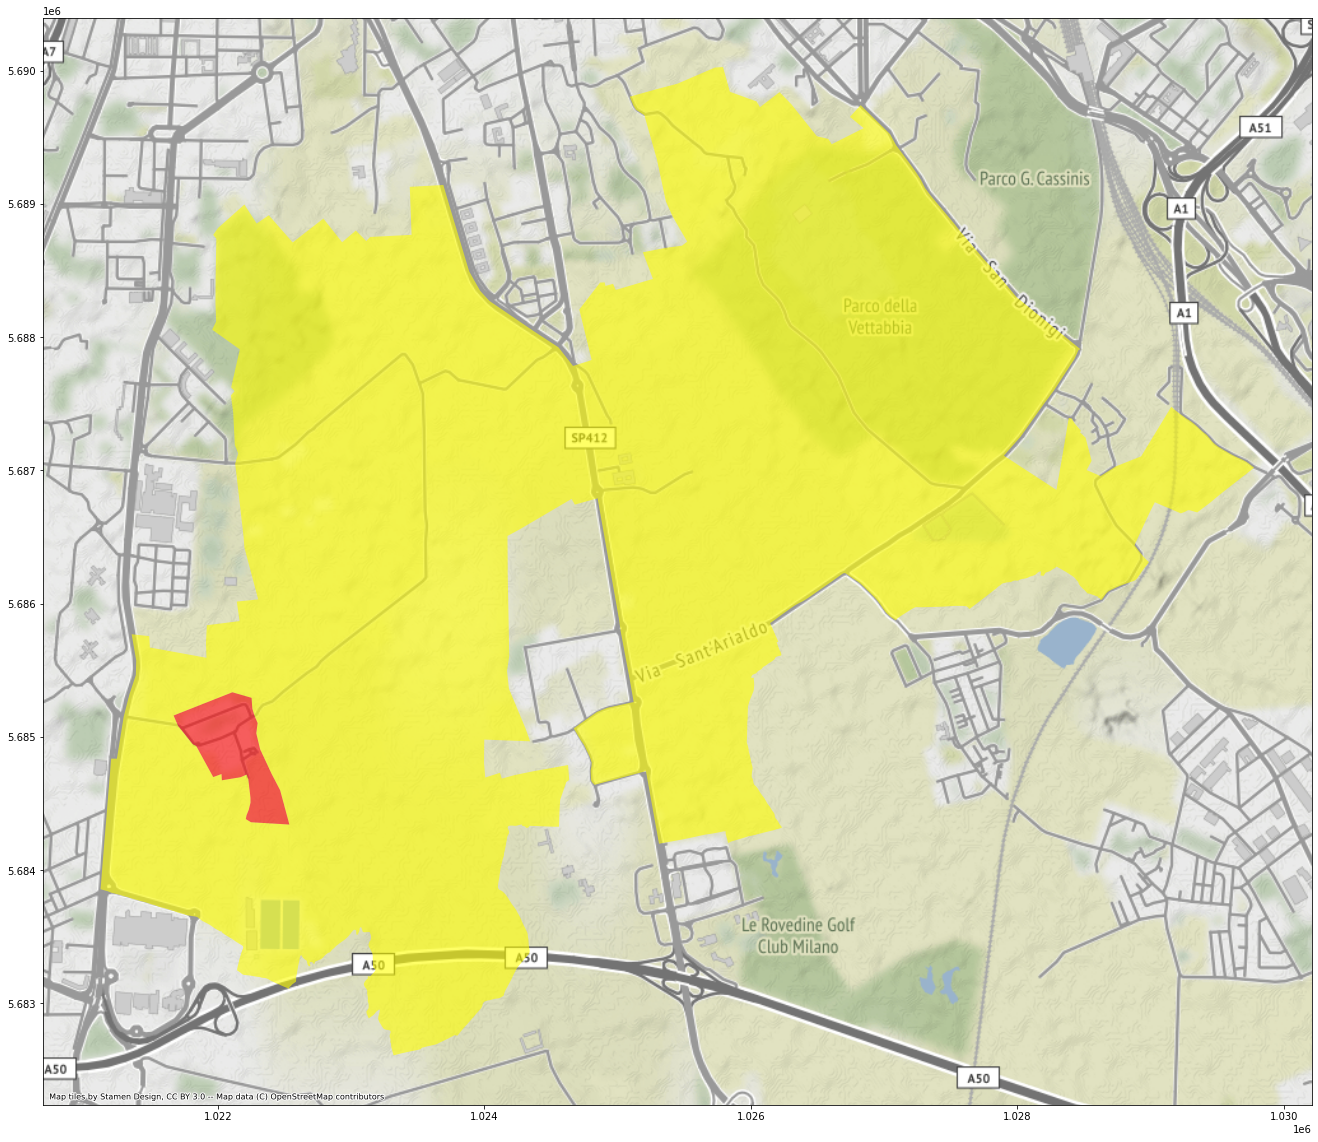

In [ ]:
# visualizzare i due quartieri sulla mappa di Milano con i colori indicati nella figura sotto


In [ ]:
# salvare in un geodataframe le informazioni sul quartiere di Affori, prendendole dal geodataframe dei quartieri

In [ ]:
affori=milano[milano["NIL"]=="AFFORI"]
affori

ID_NIL     NIL  ... OBJECTID                                           geometry
69      80  AFFORI  ...      158  POLYGON ((9.17767 45.51899, 9.17796 45.51848, ...

[1 rows x 9 columns]

ID_NIL     NIL  ... OBJECTID                                           geometry
69      80  AFFORI  ...      158  POLYGON ((9.17767 45.51899, 9.17796 45.51848, ...

[1 rows x 9 columns]

In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Affori

In [ ]:
area=affori.geometry.squeeze()

In [ ]:
biciAff=bici[bici.intersects(area)]
biciAff

id_amat  ...                                           geometry
32       9039  ...    LINESTRING (9.17915 45.51407, 9.17960 45.51413)
252      9299  ...  LINESTRING (9.18299 45.50597, 9.18272 45.50617...
255      9302  ...  LINESTRING (9.18176 45.50722, 9.18153 45.50742...
294      9342  ...  LINESTRING (9.18045 45.50883, 9.18043 45.50890...
668      9716  ...    LINESTRING (9.17925 45.51284, 9.17884 45.51277)
...       ...  ...                                                ...
2982    12754  ...    LINESTRING (9.17701 45.50897, 9.17706 45.50891)
2983    12755  ...    LINESTRING (9.17675 45.50935, 9.17701 45.50897)
2984    12756  ...    LINESTRING (9.17664 45.50951, 9.17675 45.50935)
2985    12757  ...    LINESTRING (9.17641 45.50983, 9.17664 45.50951)
2986    12758  ...    LINESTRING (9.17638 45.50988, 9.17641 45.50983)

[75 rows x 11 columns]

id_amat  ...                                           geometry
32       9039  ...    LINESTRING (9.17915 45.51407, 9.17960 45.51413)
252      9299  ...  LINESTRING (9.18299 45.50597, 9.18272 45.50617...
255      9302  ...  LINESTRING (9.18176 45.50722, 9.18153 45.50742...
294      9342  ...  LINESTRING (9.18045 45.50883, 9.18043 45.50890...
668      9716  ...    LINESTRING (9.17925 45.51284, 9.17884 45.51277)
...       ...  ...                                                ...
2982    12754  ...    LINESTRING (9.17701 45.50897, 9.17706 45.50891)
2983    12755  ...    LINESTRING (9.17675 45.50935, 9.17701 45.50897)
2984    12756  ...    LINESTRING (9.17664 45.50951, 9.17675 45.50935)
2985    12757  ...    LINESTRING (9.17641 45.50983, 9.17664 45.50951)
2986    12758  ...    LINESTRING (9.17638 45.50988, 9.17641 45.50983)

[75 rows x 11 columns]

In [ ]:
# visualizzare su una mappa il quartiere di Affori e le piste ciclabili che lo attraversano
# evidenziare bene in rosso le piste ciclabili come nell'esempio sotto

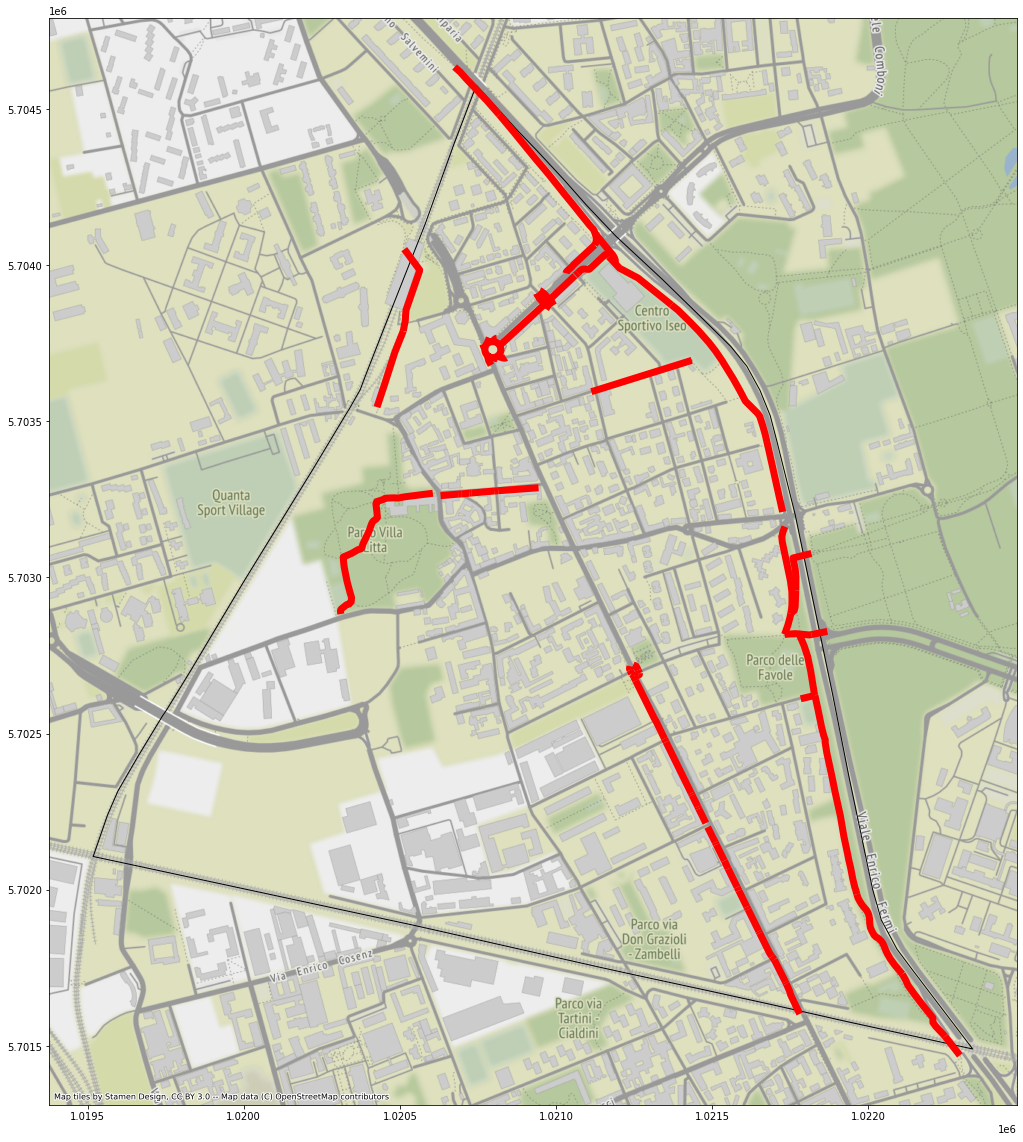